In [1]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
import csv
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import plot_confusion_matrix

In [2]:
#Load the train dataset
df = pandas.read_csv("F:/ML/Health Insurance Prediction/train.csv")
print(df.head())

   ID City_Code  Region_Code Accomodation_Type Reco_Insurance_Type  Upper_Age  \
0   1        C3         3213            Rented          Individual         36   
1   2        C5         1117             Owned               Joint         75   
2   3        C5         3732             Owned          Individual         32   
3   4       C24         4378             Owned               Joint         52   
4   5        C8         2190            Rented          Individual         44   

   Lower_Age Is_Spouse Health Indicator Holding_Policy_Duration  \
0         36        No               X1                     14+   
1         22        No               X2                     NaN   
2         32        No              NaN                     1.0   
3         48        No               X1                     14+   
4         44        No               X2                     3.0   

   Holding_Policy_Type  Reco_Policy_Cat  Reco_Policy_Premium  Response  
0                  3.0               

In [3]:
#Get the number of NAN values
print(df.isnull().sum())

ID                             0
City_Code                      0
Region_Code                    0
Accomodation_Type              0
Reco_Insurance_Type            0
Upper_Age                      0
Lower_Age                      0
Is_Spouse                      0
Health Indicator           11691
Holding_Policy_Duration    20251
Holding_Policy_Type        20251
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                       0
dtype: int64


In [4]:
print(df["Health Indicator"].value_counts())

#Imputation for Health Indicator
df["Health Indicator"] = ["X1" if pandas.isna(val) else val for val in df["Health Indicator"]]
print(df["Health Indicator"].value_counts())

X1    13010
X2    10332
X3     6762
X4     5743
X5     1727
X6     1280
X7      196
X8       78
X9       63
Name: Health Indicator, dtype: int64
X1    24701
X2    10332
X3     6762
X4     5743
X5     1727
X6     1280
X7      196
X8       78
X9       63
Name: Health Indicator, dtype: int64


In [5]:
#changing the datatype of field from str to float 
df["Health Indicator"] = [x[1:] for x in df["Health Indicator"]]
s = pandas.Series(df["Health Indicator"])
df["Health Indicator"] = pandas.to_numeric(s)

In [22]:
#Remove null values from all the fields
df = df.fillna(" ")

#Get the number of NAN values
print(df.isnull().sum())

ID                         0
City_Code                  0
Region_Code                0
Accomodation_Type          0
Reco_Insurance_Type        0
Upper_Age                  0
Lower_Age                  0
Is_Spouse                  0
Health Indicator           0
Holding_Policy_Duration    0
Holding_Policy_Type        0
Reco_Policy_Cat            0
Reco_Policy_Premium        0
Response                   0
dtype: int64


In [23]:
#1
df["City_Code"] = [val[1:] for val in df["City_Code"]]
s = pandas.Series(df["City_Code"])
df["City_Code"] = pandas.to_numeric(s)
#3
df["Accomodation_Type"] = [1 if val=="Owned" else 330 for val in df["Accomodation_Type"]]
#4
df["Reco_Insurance_Type"] = [1 if val=="Individual" else 0 for val in df["Reco_Insurance_Type"]]
#7
df["Is_Spouse"] = [1 if val=="Yes" else 0 for val in df["Is_Spouse"]]

In [4]:
Response = df["Response"]
City_Code = df["City_Code"]
Region_Code = df["Region_Code"]
Accomodation_Type = df["Accomodation_Type"]
Reco_Insurance_Type = df["Reco_Insurance_Type"]
Upper_Age = df["Upper_Age"]
Lower_Age = df["Lower_Age"]
Is_Spouse = df["Is_Spouse"]
Health_Indicator = df["Health Indicator"]
Holding_Policy_Duration = df["Holding_Policy_Duration"]
Holding_Policy_Type = df["Holding_Policy_Type"]
Reco_Policy_Cat = df["Reco_Policy_Cat"]
Reco_Policy_Premium = df["Reco_Policy_Premium"]

In [5]:
print("city_code: "+str(Response.corr(City_Code)))
print("Region_Code: "+str(Response.corr(Region_Code)))
print("Accomodation_Type: "+str(Response.corr(Accomodation_Type)))
print("Reco_Insurance_Type: "+str(Response.corr(Reco_Insurance_Type)))
print("Upper_Age: "+str(Response.corr(Upper_Age)))
print("Lower_Age: "+str(Response.corr(Lower_Age)))
print("Is_Spouse: "+str(Response.corr(Is_Spouse)))
print("Health_Indicator: "+str(Response.corr(Health_Indicator)))
# print("Holding_Policy_Duration: "+str(Response.corr(Holding_Policy_Duration)))
# print("Holding_Policy_Type: "+str(Response.corr(Holding_Policy_Type)))
print("Reco_Policy_Cat: "+str(Response.corr(Reco_Policy_Cat)))
print("Reco_Policy_Premium: "+str(Response.corr(Reco_Policy_Premium)))

city_code: -0.00542366576933948
Region_Code: 0.0011207930952068254
Accomodation_Type: -0.0052010990931822074
Reco_Insurance_Type: -0.009891323059183029
Upper_Age: 0.002772236614168545
Lower_Age: -0.002098727755272079
Is_Spouse: 0.003858958625414089
Health_Indicator: 0.003823575167154025
Reco_Policy_Cat: 0.11432063734934883
Reco_Policy_Premium: 0.007943390711708596


In [53]:
# print(df["Holding_Policy_Duration"].head(5))

# df["Holding_Policy_Duration"] = [val.real if isinstance(val, complex) else val for val in df["Holding_Policy_Duration"]]
# for val in df["Holding_Policy_Duration"]:
#     print(val)

0    14+
1       
2    1.0
3    14+
4    3.0
Name: Holding_Policy_Duration, dtype: object
14+
 
1.0
14+
3.0
5.0
 
9.0
14.0
7.0
 
3.0
1.0
 
2.0
 
11.0
 
1.0
 
3.0
 
 
 
1.0
 
 
 
 
7.0
3.0
 
 
2.0
 
 
5.0
 
1.0
3.0
14+
3.0
2.0
14.0
 
10.0
 
14+
8.0
7.0
 
 
 
7.0
3.0
14+
 
2.0
 
1.0
1.0
5.0
2.0
5.0
 
3.0
8.0
 
 
 
 
 
5.0
1.0
1.0
 
6.0
 
5.0
 
3.0
 
 
6.0
 
9.0
 
1.0
14+
2.0
 
1.0
1.0
2.0
 
9.0
 
 
 
2.0
14+
 
14+
10.0
 
9.0
 
5.0
 
 
1.0
 
 
1.0
1.0
 
 
 
6.0
1.0
 
 
 
 
4.0
1.0
6.0
8.0
14+
 
2.0
6.0
 
14+
2.0
5.0
1.0
 
4.0
2.0
4.0
3.0
 
6.0
 
1.0
 
 
1.0
8.0
2.0
11.0
7.0
9.0
4.0
14.0
 
3.0
5.0
 
 
 
5.0
 
4.0
14+
14+
1.0
14+
4.0
 
 
 
3.0
14+
14+
 
1.0
 
1.0
2.0
4.0
 
 
 
 
 
 
8.0
3.0
6.0
 
 
2.0
1.0
 
5.0
3.0
3.0
5.0
7.0
5.0
 
2.0
14+
 
 
5.0
 
 
 
6.0
 
1.0
 
 
2.0
 
 
14+
9.0
 
1.0
4.0
 
1.0
 
 
2.0
3.0
5.0
 
 
 
 
3.0
 
 
4.0
 
 
 
9.0
9.0
 
 
4.0
14+
 
13.0
 
3.0
1.0
 
1.0
14+
 
 
2.0
5.0
 
14+
2.0
 
14+
 
 
 
 
1.0
 
 
 
 
 
 
 
3.0
5.0
4.0
9.0
 
 
 
 
3.0
 
11.0
 
5.0
14+
12.0


2.0
4.0
 
3.0
1.0
 
 
 
7.0
2.0
 
2.0
14.0
2.0
 
 
14+
 
 
14+
 
 
4.0
 
3.0
 
1.0
8.0
2.0
1.0
1.0
 
 
 
14+
 
2.0
9.0
 
1.0
5.0
1.0
1.0
8.0
 
2.0
 
 
 
4.0
10.0
 
 
14+
1.0
 
 
14+
6.0
13.0
14+
2.0
 
 
14+
2.0
 
3.0
 
2.0
 
3.0
 
2.0
3.0
 
2.0
4.0
 
 
3.0
 
4.0
8.0
6.0
5.0
 
6.0
 
 
 
 
9.0
3.0
6.0
 
6.0
14+
 
2.0
14+
5.0
 
8.0
 
14+
10.0
10.0
7.0
5.0
 
 
8.0
10.0
 
 
 
 
5.0
1.0
4.0
 
 
 
1.0
14+
 
 
 
7.0
 
8.0
1.0
10.0
8.0
14.0
9.0
14.0
14+
 
4.0
 
 
8.0
14+
11.0
 
11.0
9.0
3.0
 
3.0
5.0
2.0
 
9.0
1.0
 
 
 
2.0
3.0
14+
 
4.0
1.0
 
 
2.0
1.0
2.0
 
 
 
 
8.0
2.0
3.0
3.0
4.0
 
 
14+
 
5.0
6.0
 
 
14+
7.0
14+
4.0
9.0
 
1.0
2.0
 
 
4.0
7.0
1.0
3.0
5.0
14+
4.0
13.0
 
 
2.0
2.0
 
14+
 
 
 
 
 
 
 
1.0
14+
 
 
1.0
2.0
 
4.0
7.0
 
 
2.0
4.0
10.0
14+
 
6.0
 
6.0
1.0
2.0
3.0
1.0
5.0
 
3.0
 
 
2.0
6.0
 
5.0
 
3.0
10.0
7.0
2.0
 
 
 
 
14+
7.0
11.0
 
 
7.0
9.0
 
1.0
 
 
 
 
 
6.0
1.0
14+
5.0
14+
1.0
1.0
 
 
2.0
 
6.0
5.0
4.0
 
1.0
 
7.0
4.0
14+
 
 
1.0
 
11.0
 
9.0
14+
1.0
 
2.0
3.0
 
3.0
1.0
1.

 
6.0
 
 
5.0
5.0
 
1.0
 
1.0
 
3.0
14+
 
8.0
12.0
1.0
 
 
 
4.0
 
7.0
 
 
 
 
4.0
9.0
1.0
2.0
5.0
 
 
 
2.0
2.0
2.0
1.0
 
14+
3.0
 
14.0
3.0
2.0
14+
14+
4.0
 
1.0
2.0
2.0
1.0
 
1.0
 
7.0
 
1.0
2.0
9.0
 
14+
2.0
 
7.0
1.0
14+
4.0
13.0
14+
 
14+
 
 
 
10.0
1.0
 
1.0
12.0
 
1.0
 
 
 
14+
14.0
 
 
14+
7.0
3.0
 
 
 
2.0
11.0
12.0
7.0
 
 
 
1.0
3.0
6.0
3.0
14+
2.0
 
1.0
6.0
14+
3.0
1.0
 
 
3.0
 
14+
 
 
 
14+
 
2.0
 
 
 
 
 
 
1.0
1.0
2.0
12.0
2.0
8.0
2.0
 
10.0
6.0
3.0
10.0
2.0
 
14+
 
14+
4.0
 
 
 
3.0
1.0
7.0
4.0
4.0
11.0
 
8.0
3.0
14+
 
 
2.0
 
12.0
 
 
 
 
 
13.0
14+
4.0
14+
1.0
3.0
 
 
 
14+
1.0
10.0
 
 
5.0
 
1.0
 
9.0
 
9.0
3.0
14+
5.0
2.0
 
1.0
7.0
5.0
 
 
 
1.0
 
14+
14+
 
 
 
11.0
5.0
7.0
5.0
 
5.0
14.0
5.0
 
 
11.0
5.0
 
4.0
4.0
3.0
1.0
 
 
 
14+
2.0
5.0
1.0
1.0
3.0
 
6.0
 
 
12.0
10.0
1.0
12.0
5.0
6.0
 
1.0
10.0
6.0
6.0
6.0
 
1.0
 
1.0
7.0
 
1.0
7.0
4.0
2.0
6.0
 
14+
14+
3.0
 
1.0
14+
3.0
9.0
 
2.0
 
14.0
 
4.0
11.0
4.0
2.0
 
14+
4.0
8.0
 
9.0
5.0
 
 
2.0
2.0
5.0
3.0
 
7.0
3.0


 
5.0
 
 
 
 
 
12.0
 
9.0
3.0
 
14+
3.0
 
1.0
 
3.0
9.0
 
 
14+
 
5.0
12.0
 
2.0
3.0
3.0
7.0
 
 
 
 
 
3.0
10.0
 
8.0
7.0
 
4.0
 
14+
 
1.0
4.0
6.0
 
2.0
3.0
8.0
 
14+
3.0
 
 
3.0
 
9.0
2.0
 
 
1.0
 
 
14+
3.0
2.0
 
 
13.0
14.0
2.0
7.0
2.0
10.0
1.0
3.0
2.0
5.0
1.0
14+
12.0
3.0
14+
11.0
4.0
9.0
 
10.0
8.0
4.0
 
5.0
14+
8.0
 
7.0
4.0
 
7.0
 
14+
 
 
13.0
5.0
4.0
6.0
 
4.0
14+
3.0
 
3.0
14+
 
 
7.0
9.0
1.0
5.0
 
 
 
6.0
1.0
 
3.0
6.0
1.0
 
5.0
 
4.0
14+
 
11.0
 
2.0
 
10.0
1.0
 
 
14+
 
 
2.0
 
 
6.0
 
7.0
3.0
2.0
 
1.0
1.0
11.0
9.0
 
 
1.0
3.0
 
1.0
 
 
8.0
3.0
 
3.0
 
4.0
 
4.0
3.0
1.0
 
2.0
 
1.0
 
 
14+
3.0
3.0
9.0
1.0
 
 
5.0
 
14+
9.0
1.0
1.0
14.0
2.0
 
13.0
 
14+
14+
14+
 
5.0
 
 
14.0
 
2.0
14+
1.0
 
 
 
14+
5.0
 
 
2.0
3.0
6.0
1.0
4.0
 
14+
 
 
2.0
 
 
6.0
1.0
3.0
 
 
1.0
 
6.0
14+
12.0
 
 
8.0
 
 
14+
 
10.0
4.0
5.0
2.0
 
 
 
1.0
2.0
14+
9.0
14+
 
2.0
5.0
4.0
2.0
3.0
1.0
6.0
10.0
 
1.0
3.0
 
 
3.0
5.0
4.0
 
 
3.0
 
 
1.0
2.0
3.0
14+
4.0
 
4.0
14+
5.0
3.0
2.0
1.0
 
5.0
 
4.0
6.0

14+
6.0
1.0
14+
 
 
 
5.0
 
 
7.0
13.0
5.0
6.0
2.0
6.0
14.0
11.0
 
14+
6.0
 
13.0
 
4.0
14+
 
14+
 
7.0
 
14.0
 
3.0
10.0
 
 
 
 
14+
 
11.0
 
9.0
1.0
 
 
10.0
3.0
7.0
2.0
 
1.0
6.0
4.0
10.0
 
2.0
 
2.0
14+
 
4.0
 
5.0
14+
3.0
14.0
 
2.0
2.0
14+
14+
10.0
6.0
 
2.0
4.0
14+
5.0
3.0
4.0
8.0
 
2.0
2.0
 
4.0
 
 
5.0
14+
9.0
11.0
14.0
14+
1.0
 
 
9.0
 
3.0
 
14+
14+
 
14+
 
 
3.0
5.0
 
9.0
14+
1.0
4.0
3.0
4.0
6.0
2.0
 
 
2.0
 
 
14+
 
14+
10.0
 
7.0
 
 
3.0
 
5.0
2.0
 
1.0
1.0
5.0
1.0
 
5.0
4.0
 
 
 
 
1.0
14+
4.0
4.0
7.0
14+
3.0
2.0
1.0
11.0
 
 
 
 
 
12.0
4.0
4.0
 
14+
 
14+
1.0
14+
2.0
1.0
2.0
 
12.0
 
 
1.0
14+
 
1.0
 
1.0
1.0
 
1.0
4.0
 
4.0
 
1.0
4.0
4.0
 
 
3.0
 
 
 
7.0
1.0
 
8.0
3.0
 
 
 
 
3.0
4.0
1.0
 
 
4.0
14+
3.0
10.0
9.0
5.0
9.0
 
 
2.0
1.0
3.0
 
 
 
 
14+
7.0
14+
 
1.0
6.0
1.0
 
 
3.0
5.0
14+
 
3.0
 
 
 
2.0
 
 
6.0
14+
 
7.0
 
14+
 
3.0
5.0
14+
 
 
7.0
11.0
 
14+
 
7.0
11.0
 
4.0
8.0
12.0
14+
1.0
7.0
5.0
2.0
10.0
 
 
8.0
3.0
 
2.0
 
14+
 
 
4.0
 
 
8.0
 
 
4.0
6.0
 
 
14+
1.

6.0
 
14+
2.0
3.0
4.0
 
2.0
1.0
11.0
3.0
 
 
 
2.0
2.0
 
3.0
 
 
 
 
2.0
14+
 
 
 
9.0
4.0
5.0
14+
5.0
14+
14+
 
 
 
 
 
3.0
14+
4.0
12.0
 
 
 
9.0
7.0
1.0
 
 
 
14+
5.0
14+
 
4.0
 
 
5.0
12.0
 
1.0
8.0
11.0
 
14+
14+
 
 
6.0
4.0
1.0
11.0
3.0
 
 
2.0
 
 
 
 
3.0
14+
1.0
12.0
 
 
 
3.0
 
6.0
 
14+
6.0
 
 
 
 
 
14+
9.0
14+
4.0
 
5.0
8.0
3.0
3.0
2.0
14+
2.0
3.0
6.0
1.0
14.0
 
 
 
 
8.0
13.0
14+
 
3.0
 
14+
2.0
 
10.0
1.0
1.0
10.0
 
2.0
3.0
 
12.0
14+
 
14+
14+
7.0
14+
 
2.0
1.0
 
 
4.0
3.0
9.0
3.0
3.0
 
14+
 
 
 
 
3.0
 
 
 
3.0
14+
5.0
 
6.0
 
2.0
1.0
 
 
1.0
14+
6.0
 
 
3.0
 
1.0
1.0
 
5.0
14+
7.0
1.0
14+
 
7.0
2.0
2.0
7.0
8.0
 
 
3.0
5.0
 
 
10.0
 
2.0
10.0
12.0
 
6.0
14+
3.0
 
6.0
 
6.0
2.0
 
14+
 
5.0
8.0
14+
 
7.0
 
6.0
 
 
 
 
 
6.0
3.0
 
3.0
 
 
7.0
 
2.0
 
1.0
4.0
8.0
2.0
 
 
 
 
12.0
1.0
7.0
14+
 
7.0
5.0
13.0
14+
1.0
5.0
14+
 
 
 
12.0
7.0
14+
11.0
10.0
5.0
6.0
3.0
14+
14+
5.0
 
5.0
 
14+
 
13.0
1.0
 
 
5.0
1.0
4.0
7.0
 
9.0
13.0
 
2.0
 
9.0
3.0
14+
14+
5.0
 
6.0
14+
14+
14+
 

 
 
14+
7.0
 
5.0
7.0
 
 
 
 
 
3.0
2.0
7.0
5.0
2.0
4.0
14+
4.0
 
 
3.0
 
5.0
 
1.0
 
14+
2.0
6.0
1.0
4.0
14+
8.0
12.0
 
 
 
5.0
1.0
2.0
1.0
2.0
8.0
 
3.0
 
4.0
3.0
9.0
 
6.0
 
 
6.0
 
4.0
 
 
 
2.0
7.0
3.0
 
 
 
8.0
2.0
6.0
1.0
2.0
 
2.0
1.0
 
 
1.0
11.0
13.0
 
 
9.0
3.0
14+
 
 
4.0
9.0
3.0
1.0
14.0
 
 
 
1.0
2.0
2.0
 
13.0
1.0
 
 
 
 
3.0
6.0
8.0
4.0
14+
1.0
1.0
 
 
 
14+
5.0
 
3.0
 
7.0
 
6.0
 
3.0
1.0
 
 
6.0
14+
2.0
 
3.0
2.0
1.0
9.0
 
 
 
7.0
5.0
2.0
 
 
 
 
4.0
2.0
10.0
1.0
3.0
 
 
1.0
3.0
 
5.0
2.0
5.0
 
9.0
 
3.0
10.0
 
 
3.0
 
 
5.0
1.0
2.0
13.0
 
 
4.0
 
 
 
 
2.0
 
5.0
 
5.0
6.0
14+
1.0
 
6.0
1.0
2.0
 
 
2.0
 
 
 
 
2.0
3.0
1.0
 
11.0
 
7.0
9.0
3.0
 
 
7.0
2.0
 
14+
4.0
 
2.0
 
3.0
1.0
4.0
 
5.0
 
4.0
8.0
6.0
1.0
6.0
2.0
 
 
 
1.0
14+
 
 
3.0
4.0
5.0
2.0
 
 
7.0
 
 
4.0
3.0
 
14+
 
1.0
2.0
1.0
5.0
2.0
4.0
14+
 
5.0
4.0
6.0
14+
2.0
 
6.0
1.0
14+
 
7.0
1.0
 
1.0
5.0
8.0
 
5.0
7.0
4.0
 
3.0
 
 
1.0
14+
 
 
 
5.0
1.0
 
 
2.0
 
 
9.0
 
6.0
1.0
2.0
 
2.0
14+
5.0
 
12.0
 
7.0
14+


3.0
5.0
10.0
2.0
14+
14+
2.0
 
 
 
2.0
 
14+
1.0
 
3.0
1.0
4.0
4.0
4.0
 
1.0
1.0
1.0
 
1.0
4.0
 
 
3.0
 
5.0
1.0
 
 
3.0
 
1.0
 
10.0
6.0
7.0
1.0
1.0
2.0
7.0
4.0
11.0
6.0
 
 
 
3.0
14+
 
10.0
 
9.0
4.0
5.0
1.0
4.0
12.0
4.0
11.0
 
1.0
 
6.0
4.0
 
5.0
3.0
3.0
14+
1.0
14.0
3.0
 
 
10.0
2.0
14+
4.0
1.0
2.0
9.0
3.0
2.0
6.0
5.0
 
1.0
13.0
1.0
4.0
2.0
5.0
2.0
 
 
6.0
 
7.0
 
14+
 
2.0
 
3.0
 
 
 
2.0
1.0
11.0
 
 
14+
1.0
2.0
9.0
14+
10.0
1.0
 
1.0
 
2.0
 
14+
2.0
14.0
 
1.0
 
3.0
13.0
 
4.0
2.0
12.0
9.0
 
2.0
10.0
3.0
4.0
 
 
 
14+
5.0
4.0
14+
1.0
8.0
 
 
2.0
1.0
4.0
 
 
3.0
8.0
8.0
5.0
2.0
4.0
 
6.0
 
4.0
 
6.0
10.0
14+
9.0
7.0
 
5.0
12.0
 
6.0
14+
 
 
 
 
 
2.0
2.0
 
1.0
4.0
 
7.0
14+
5.0
 
2.0
14+
2.0
8.0
6.0
 
1.0
14.0
7.0
2.0
14.0
1.0
1.0
 
4.0
 
1.0
 
2.0
13.0
 
3.0
3.0
5.0
9.0
6.0
5.0
7.0
4.0
 
14+
8.0
4.0
2.0
 
 
 
10.0
 
3.0
3.0
8.0
2.0
9.0
6.0
 
 
 
10.0
1.0
 
2.0
14+
 
1.0
 
 
1.0
14+
5.0
2.0
3.0
9.0
 
2.0
14+
 
3.0
14+
8.0
1.0
 
2.0
1.0
14+
2.0
7.0
14+
 
 
5.0
2.0
14+
 
 
11.0
2.0

 
 
2.0
 
2.0
14+
2.0
 
 
5.0
14+
 
4.0
11.0
 
5.0
5.0
9.0
2.0
3.0
 
 
 
 
8.0
 
2.0
3.0
2.0
4.0
12.0
4.0
9.0
 
 
4.0
14+
2.0
9.0
 
12.0
 
2.0
2.0
 
4.0
 
7.0
5.0
2.0
1.0
14+
 
1.0
1.0
2.0
 
4.0
5.0
14+
2.0
1.0
14+
14.0
 
4.0
 
8.0
1.0
 
7.0
7.0
11.0
 
3.0
6.0
 
6.0
10.0
 
14+
8.0
4.0
2.0
 
1.0
14+
5.0
14+
2.0
 
2.0
3.0
 
14+
 
1.0
3.0
 
4.0
5.0
14+
10.0
2.0
3.0
1.0
5.0
 
 
1.0
2.0
3.0
 
2.0
4.0
1.0
1.0
 
2.0
14+
 
4.0
14+
14+
 
1.0
 
 
14.0
 
 
14+
 
2.0
 
5.0
3.0
 
9.0
4.0
8.0
 
4.0
14+
 
1.0
4.0
 
2.0
 
 
 
 
3.0
2.0
 
 
 
5.0
 
9.0
 
11.0
9.0
2.0
2.0
7.0
3.0
10.0
7.0
14+
3.0
6.0
3.0
8.0
 
 
1.0
13.0
 
 
 
2.0
 
 
1.0
14+
1.0
 
6.0
 
 
 
3.0
4.0
2.0
1.0
 
9.0
10.0
 
 
 
1.0
 
2.0
 
1.0
6.0
 
2.0
14+
14.0
5.0
2.0
3.0
2.0
 
3.0
3.0
 
 
14+
2.0
 
 
 
 
2.0
 
5.0
 
14.0
2.0
 
2.0
5.0
10.0
3.0
14+
 
5.0
1.0
 
 
 
 
14+
6.0
4.0
 
 
6.0
14+
1.0
 
5.0
8.0
 
 
1.0
 
4.0
 
 
 
4.0
11.0
14+
4.0
2.0
14+
 
3.0
6.0
 
10.0
 
10.0
14+
5.0
14+
 
9.0
 
5.0
 
 
 
 
 
 
5.0
5.0
14+
 
 
11.0
 
2.0
 
3.0

1.0
14+
2.0
3.0
7.0
 
 
5.0
 
 
 
4.0
14+
4.0
 
5.0
 
3.0
3.0
4.0
4.0
 
11.0
6.0
 
11.0
 
 
4.0
4.0
14+
1.0
 
 
 
1.0
1.0
 
2.0
4.0
4.0
 
3.0
3.0
 
8.0
14+
6.0
3.0
 
5.0
6.0
 
2.0
 
 
12.0
14+
1.0
 
 
7.0
14+
1.0
11.0
 
10.0
 
2.0
3.0
1.0
 
2.0
6.0
14+
14+
 
9.0
2.0
4.0
 
3.0
14+
2.0
8.0
2.0
 
 
1.0
5.0
9.0
14+
4.0
14+
 
 
 
14+
3.0
7.0
 
5.0
 
6.0
1.0
14.0
 
14+
 
2.0
 
 
 
2.0
 
 
2.0
4.0
5.0
 
5.0
4.0
7.0
2.0
 
3.0
3.0
5.0
5.0
2.0
9.0
2.0
14+
4.0
14+
10.0
1.0
8.0
 
 
5.0
7.0
 
8.0
1.0
 
14.0
3.0
4.0
14+
5.0
14.0
14+
11.0
2.0
 
9.0
 
 
3.0
 
2.0
 
 
4.0
 
1.0
4.0
 
 
2.0
5.0
12.0
4.0
 
2.0
13.0
1.0
3.0
 
 
7.0
 
 
5.0
 
4.0
1.0
 
 
14+
14+
7.0
3.0
4.0
14+
14+
 
 
1.0
 
 
14+
 
 
 
1.0
5.0
 
 
 
 
5.0
 
2.0
 
3.0
2.0
1.0
 
 
1.0
4.0
14+
3.0
 
6.0
7.0
3.0
7.0
4.0
12.0
14+
 
 
 
1.0
 
 
 
 
4.0
2.0
 
 
4.0
 
 
 
1.0
 
 
 
 
 
 
 
14.0
1.0
14+
 
 
 
5.0
1.0
 
10.0
12.0
7.0
2.0
 
3.0
12.0
 
4.0
 
9.0
6.0
 
 
2.0
5.0
 
13.0
4.0
1.0
5.0
 
 
1.0
1.0
 
1.0
 
 
6.0
 
 
14+
 
1.0
5.0
5.0
 
3.0


6.0
3.0
14+
1.0
3.0
1.0
2.0
 
5.0
13.0
14+
1.0
14+
 
3.0
14+
14+
3.0
2.0
14+
 
 
 
8.0
8.0
1.0
2.0
 
14+
13.0
2.0
 
2.0
7.0
 
 
 
2.0
 
 
14+
 
 
 
 
 
1.0
 
2.0
4.0
1.0
4.0
 
 
1.0
1.0
10.0
3.0
1.0
14+
2.0
7.0
 
6.0
2.0
 
2.0
1.0
1.0
2.0
2.0
2.0
 
 
 
2.0
1.0
14+
14+
 
4.0
 
 
1.0
 
2.0
1.0
4.0
8.0
 
 
 
 
4.0
9.0
 
4.0
 
2.0
3.0
3.0
 
3.0
10.0
 
14.0
 
2.0
3.0
 
11.0
 
14+
1.0
14+
 
 
4.0
4.0
2.0
 
11.0
7.0
 
 
14+
 
 
 
5.0
3.0
14+
14+
 
1.0
 
2.0
9.0
2.0
 
 
 
3.0
 
1.0
4.0
5.0
 
4.0
11.0
1.0
2.0
 
1.0
4.0
1.0
12.0
 
5.0
3.0
4.0
 
6.0
9.0
1.0
 
 
3.0
2.0
 
 
8.0
4.0
8.0
 
2.0
14+
1.0
 
14.0
8.0
 
 
2.0
7.0
3.0
 
 
2.0
2.0
 
10.0
2.0
2.0
4.0
14+
 
9.0
 
5.0
 
1.0
4.0
6.0
 
 
 
10.0
 
 
8.0
 
3.0
2.0
14+
11.0
 
1.0
4.0
 
5.0
14+
2.0
 
3.0
 
 
 
7.0
 
14.0
7.0
1.0
 
14+
 
 
 
11.0
 
 
14+
 
 
 
 
 
 
14+
4.0
 
9.0
 
 
 
7.0
3.0
3.0
 
1.0
4.0
5.0
14+
 
 
 
 
3.0
1.0
 
9.0
 
14.0
7.0
 
 
14+
 
 
8.0
 
1.0
5.0
3.0
4.0
3.0
14+
2.0
2.0
 
2.0
7.0
14.0
3.0
3.0
 
2.0
2.0
2.0
 
14+
 
14+
 
 
 

 
5.0
5.0
 
 
14.0
2.0
 
3.0
 
10.0
1.0
 
6.0
14+
14+
 
 
4.0
5.0
 
10.0
1.0
14.0
5.0
 
 
5.0
 
2.0
 
13.0
 
1.0
 
 
7.0
 
 
3.0
14+
7.0
 
2.0
3.0
4.0
14+
8.0
9.0
 
1.0
11.0
 
1.0
 
6.0
 
2.0
8.0
 
 
 
3.0
7.0
3.0
6.0
 
 
5.0
4.0
5.0
1.0
4.0
8.0
 
 
5.0
9.0
2.0
1.0
 
 
 
 
 
2.0
 
 
7.0
 
8.0
9.0
3.0
1.0
4.0
 
5.0
 
5.0
 
7.0
3.0
5.0
2.0
 
 
 
 
2.0
 
 
5.0
 
14+
 
1.0
2.0
 
1.0
2.0
12.0
 
5.0
 
 
 
 
6.0
 
7.0
4.0
2.0
 
4.0
2.0
 
 
 
 
3.0
3.0
 
 
3.0
2.0
3.0
4.0
 
 
4.0
9.0
3.0
 
4.0
5.0
 
4.0
9.0
8.0
 
3.0
7.0
5.0
14+
 
1.0
2.0
2.0
14+
 
1.0
 
13.0
 
 
2.0
7.0
 
 
13.0
8.0
1.0
 
7.0
2.0
 
3.0
 
1.0
1.0
5.0
7.0
 
 
 
5.0
 
 
 
14+
7.0
3.0
 
 
14+
 
 
3.0
 
8.0
2.0
14+
4.0
4.0
14+
1.0
2.0
 
3.0
1.0
7.0
4.0
5.0
7.0
10.0
1.0
5.0
7.0
13.0
1.0
4.0
6.0
 
14+
 
5.0
7.0
8.0
1.0
14+
 
 
3.0
2.0
 
 
 
4.0
2.0
 
1.0
 
 
 
14+
9.0
6.0
6.0
 
4.0
 
4.0
1.0
 
 
 
2.0
6.0
8.0
 
 
 
8.0
10.0
 
1.0
 
 
4.0
 
4.0
3.0
 
11.0
1.0
4.0
 
 
14+
1.0
1.0
14+
 
7.0
3.0
 
3.0
14+
7.0
 
3.0
14+
 
9.0
3.0
 
5.0
 

 
 
1.0
 
11.0
 
3.0
3.0
5.0
3.0
14.0
2.0
2.0
 
8.0
14+
14+
3.0
13.0
5.0
 
 
7.0
3.0
3.0
1.0
3.0
2.0
 
 
3.0
14+
 
 
4.0
1.0
 
2.0
2.0
9.0
4.0
1.0
 
6.0
 
 
14+
 
3.0
4.0
 
5.0
14+
2.0
3.0
3.0
6.0
2.0
 
 
1.0
14+
 
 
3.0
3.0
3.0
 
14+
 
 
4.0
 
2.0
 
7.0
12.0
 
 
6.0
1.0
14+
1.0
 
 
 
3.0
 
 
4.0
5.0
 
2.0
3.0
14+
6.0
 
 
 
 
3.0
 
4.0
1.0
2.0
 
 
 
 
 
2.0
3.0
6.0
 
3.0
14+
 
 
 
8.0
14+
1.0
1.0
11.0
 
 
 
 
 
1.0
2.0
14+
 
 
 
2.0
4.0
1.0
 
14.0
 
2.0
14+
14+
3.0
1.0
4.0
 
2.0
 
4.0
 
3.0
13.0
8.0
 
12.0
 
3.0
 
5.0
2.0
 
 
5.0
5.0
4.0
3.0
 
14+
8.0
 
2.0
8.0
 
 
 
4.0
3.0
10.0
 
2.0
3.0
 
 
14.0
4.0
4.0
2.0
 
7.0
14+
 
 
2.0
 
5.0
14.0
2.0
12.0
 
 
1.0
 
8.0
 
5.0
1.0
2.0
3.0
8.0
 
8.0
 
7.0
3.0
11.0
 
 
3.0
 
 
3.0
 
8.0
14+
 
2.0
 
 
 
 
5.0
10.0
 
4.0
 
 
5.0
4.0
2.0
3.0
3.0
5.0
1.0
2.0
 
 
14+
2.0
1.0
 
3.0
 
1.0
 
10.0
14+
8.0
14+
 
13.0
 
9.0
 
2.0
5.0
 
 
1.0
10.0
1.0
 
 
2.0
7.0
2.0
 
7.0
 
14.0
3.0
 
 
 
 
2.0
10.0
5.0
 
5.0
5.0
4.0
 
14+
 
3.0
 
1.0
 
 
4.0
 
1.0
14+
 
 
8

 
8.0
1.0
11.0
1.0
 
1.0
 
 
1.0
 
 
 
1.0
12.0
5.0
7.0
3.0
 
6.0
14+
 
 
11.0
8.0
1.0
 
8.0
1.0
 
5.0
7.0
 
 
3.0
 
5.0
4.0
 
 
14+
3.0
 
4.0
 
7.0
 
2.0
12.0
1.0
3.0
 
 
7.0
14+
 
14+
 
 
5.0
 
14+
3.0
 
14+
14+
 
2.0
10.0
3.0
6.0
5.0
 
 
 
2.0
14+
 
14+
 
14.0
 
14+
 
 
 
 
 
 
 
14.0
2.0
 
1.0
8.0
2.0
 
4.0
 
7.0
 
2.0
2.0
11.0
4.0
 
8.0
1.0
4.0
 
 
 
3.0
1.0
 
14+
 
 
 
5.0
9.0
 
3.0
14+
14+
 
 
 
 
8.0
12.0
1.0
14+
 
7.0
 
3.0
 
6.0
5.0
 
 
 
 
7.0
10.0
 
 
 
5.0
1.0
1.0
 
4.0
 
 
1.0
 
6.0
 
7.0
 
6.0
6.0
 
 
 
14+
3.0
14.0
3.0
4.0
 
1.0
14+
14.0
4.0
5.0
 
 
14+
 
 
4.0
 
7.0
 
3.0
 
 
13.0
2.0
8.0
2.0
9.0
 
1.0
4.0
3.0
 
14+
7.0
7.0
2.0
 
4.0
3.0
3.0
8.0
 
 
1.0
 
5.0
1.0
 
14+
5.0
7.0
3.0
10.0
 
 
 
 
 
 
14+
2.0
 
14+
6.0
 
 
4.0
14+
6.0
 
 
7.0
6.0
 
2.0
 
1.0
3.0
 
 
 
14+
 
3.0
 
 
9.0
1.0
5.0
1.0
 
 
 
4.0
14+
7.0
 
2.0
2.0
2.0
9.0
5.0
14+
 
1.0
6.0
2.0
2.0
3.0
 
 
4.0
14+
 
 
3.0
10.0
4.0
 
 
14+
7.0
1.0
13.0
14+
14+
 
1.0
 
3.0
8.0
1.0
 
 
 
1.0
11.0
4.0
 
8.0
 
 
4.0
1

 
 
 
 
9.0
5.0
 
 
 
3.0
1.0
9.0
4.0
 
 
 
5.0
 
 
 
14+
5.0
3.0
2.0
3.0
 
6.0
6.0
1.0
6.0
7.0
1.0
5.0
8.0
 
7.0
 
5.0
5.0
2.0
 
4.0
2.0
 
6.0
14+
 
8.0
 
 
3.0
 
 
8.0
2.0
 
 
7.0
8.0
 
2.0
 
 
 
5.0
8.0
4.0
6.0
 
 
2.0
 
3.0
 
3.0
 
3.0
 
 
4.0
14+
9.0
 
3.0
 
3.0
 
4.0
1.0
5.0
6.0
 
 
2.0
9.0
 
 
7.0
4.0
6.0
3.0
1.0
 
 
 
6.0
 
5.0
14+
2.0
 
2.0
 
2.0
1.0
4.0
2.0
 
6.0
2.0
7.0
 
3.0
1.0
14+
1.0
2.0
13.0
8.0
 
7.0
14+
 
 
11.0
 
 
 
 
14+
14+
2.0
8.0
 
2.0
 
 
4.0
14+
2.0
 
 
 
 
14+
 
 
9.0
 
2.0
14+
 
5.0
2.0
 
2.0
6.0
4.0
6.0
9.0
 
5.0
 
 
6.0
1.0
4.0
14+
 
1.0
 
2.0
8.0
 
 
8.0
4.0
 
14+
 
 
8.0
7.0
 
 
 
3.0
3.0
2.0
 
9.0
 
12.0
1.0
3.0
3.0
5.0
 
2.0
9.0
14+
10.0
 
 
1.0
14+
9.0
 
3.0
2.0
13.0
 
14+
 
8.0
13.0
 
3.0
 
 
4.0
 
14+
 
 
1.0
 
13.0
3.0
14+
 
2.0
 
1.0
 
14.0
9.0
2.0
3.0
14+
3.0
 
9.0
1.0
 
2.0
5.0
12.0
9.0
14+
 
 
5.0
10.0
 
14.0
8.0
10.0
 
14+
2.0
9.0
 
3.0
 
 
14+
14+
10.0
6.0
 
7.0
1.0
 
8.0
 
1.0
9.0
6.0
 
3.0
6.0
4.0
3.0
6.0
 
9.0
1.0
 
1.0
12.0
 
12.0
4.0
2.0

In [6]:
print(df["City_Code"].head(5))
print(df["Accomodation_Type"].head(5))
print(df["Reco_Insurance_Type"].head(5))
print(df["Is_Spouse"].head(5))
print(df["Health Indicator"].head(5))
print(df["Holding_Policy_Duration"].head(5))

0     3
1     5
2     5
3    24
4     8
Name: City_Code, dtype: int64
0    330
1      1
2      1
3      1
4    330
Name: Accomodation_Type, dtype: int64
0    1
1    0
2    1
3    0
4    1
Name: Reco_Insurance_Type, dtype: int64
0    0
1    0
2    0
3    0
4    0
Name: Is_Spouse, dtype: int64
0    1.0
1    2.0
2    0.0
3    1.0
4    2.0
Name: Health Indicator, dtype: float64
0    14+
1       
2    1.0
3    14+
4    3.0
Name: Holding_Policy_Duration, dtype: object


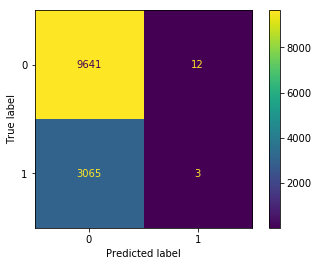

Accuracy: 75.81165002751355%


In [6]:
X = df.iloc[:,[0,8]]
# X = df.iloc[:,[0,1,2,3,4,5,6,7,8,11]]
y = df["Response"]

X_train, X_test, y_train, y_test = train_test_split(X, y)

from sklearn.tree import DecisionTreeClassifier 
model = DecisionTreeClassifier(max_depth=6).fit(X_train, y_train)

predict = model.predict(X_test)

matrix = confusion_matrix(y_test, predict)

plot_confusion_matrix(model, X_test, y_test)
plt.show()

accuracy = (matrix[0,0]+matrix[1,1])/(matrix[0,0]+matrix[1,1]+matrix[0,1]+matrix[1,0])*100
print("Accuracy: "+str(accuracy)+"%")

In [8]:
from sklearn.tree import DecisionTreeClassifier 
model = DecisionTreeClassifier(max_depth=6).fit(X_train, y_train)

test = pandas.read_csv("F:/ML/Health Insurance Prediction/test.csv")
test = test.iloc[:,[0,1,2,3,4,5,6,7,8,11]]
# test = test.iloc[:,[0,11]]
test = test.fillna(" ")

In [9]:
#1
test["City_Code"] = [val[1:] for val in test["City_Code"]]
s = pandas.Series(test["City_Code"])
test["City_Code"] = pandas.to_numeric(s)
#3
test["Accomodation_Type"] = [1 if val=="Owned" else 330 for val in test["Accomodation_Type"]]
#4
test["Reco_Insurance_Type"] = [1 if val=="Individual" else 0 for val in test["Reco_Insurance_Type"]]
#7
test["Is_Spouse"] = [1 if val=="Yes" else 0 for val in test["Is_Spouse"]]
#8
test["Health Indicator"] = [x[1:] for x in test["Health Indicator"]]
s = pandas.Series(test["Health Indicator"])
test["Health Indicator"] = pandas.to_numeric(s)

import math
test["Health Indicator"] = [0.0 if math.isnan(val) else val for val in test["Health Indicator"]] 


In [10]:
predict = model.predict(test)
s = predict.size

submission = []
for i in range(s):
    data =[]
    data.append(test.iloc[i,0])
    data.append(predict[i])
    submission.append(data)
    
df_sample = pandas.DataFrame(submission, columns = ['ID', 'Response']) 
print(len(df_sample.columns))

df_sample.to_csv("F:/ML/Health Insurance Prediction/submission.csv", index=False)

# f = open("F:/ML/Health Insurance Prediction/sample.csv", "a")
# f.write(df_sample)
# f.close()

2
